In [115]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [116]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [117]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [118]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data_nd = scaler.fit_transform(market_data_df)
display (scaled_data_nd[0:5])

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [119]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
scaled_data_df = pd.DataFrame(scaled_data_nd, index=market_data_df.index, columns=market_data_df.columns)

# Display sample data
scaled_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [120]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=k, random_state=0)

# 2. Fit the model to the data using the scaled DataFrame
    k_model.fit(scaled_data_df)

# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


<Axes: title={'center': 'Elbow Curve for Optimal k'}, xlabel='Number of clusters (k)', ylabel='Inertia'>

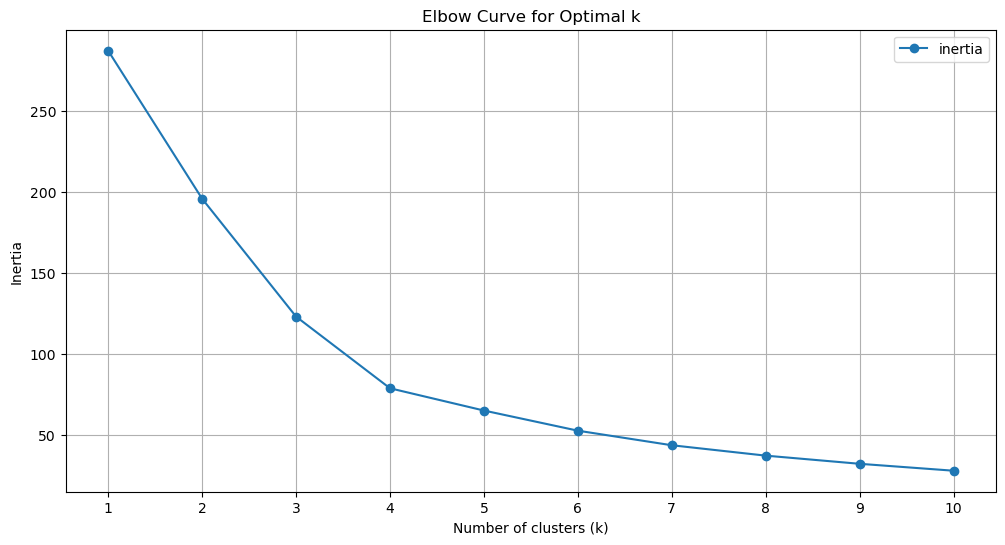

In [121]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the Elbow curve using the DataFrame
elbow_df.plot.line(
    x='k',
    y='inertia',
    marker='o',
    figsize=(12, 6),
    xlabel = 'Number of clusters (k)',
    ylabel = 'Inertia',
    title ='Elbow Curve for Optimal k',
    xticks = elbow_df['k'],
    grid = True)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** ***It looks to me like 4 is the best value for `k`***

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [122]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

In [123]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [124]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_centers = kmeans.cluster_centers_

# View the resulting array of cluster values.
cluster_centers

array([[ 0.23756041,  1.19101578,  0.83462785,  0.19065425, -0.212313  ,
        -0.22264199, -0.20800783],
       [-4.98104189, -0.04517829, -1.20695612, -1.21212587,  0.04773554,
         4.63238025,  6.08862545],
       [ 1.04553034, -0.61832816,  2.90705393,  5.35145461,  4.76991278,
         3.14887546,  1.34848839],
       [ 0.03258562, -0.56998841, -0.4827023 , -0.25453208, -0.07913767,
        -0.18795807, -0.18203893]])

In [125]:
# Create a copy of the DataFrame
clustered_scaled_data_df = scaled_data_df.copy()

In [126]:
# Add a new column to the DataFrame with the predicted clusters
clustered_scaled_data_df['Cluster'] = kmeans.labels_

# Display sample data
clustered_scaled_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Axes: title={'center': 'Cryptocurrency Price Changes: 24h vs 7d'}, xlabel='24h Price Change Percentage', ylabel='7d Price Change Percentage'>

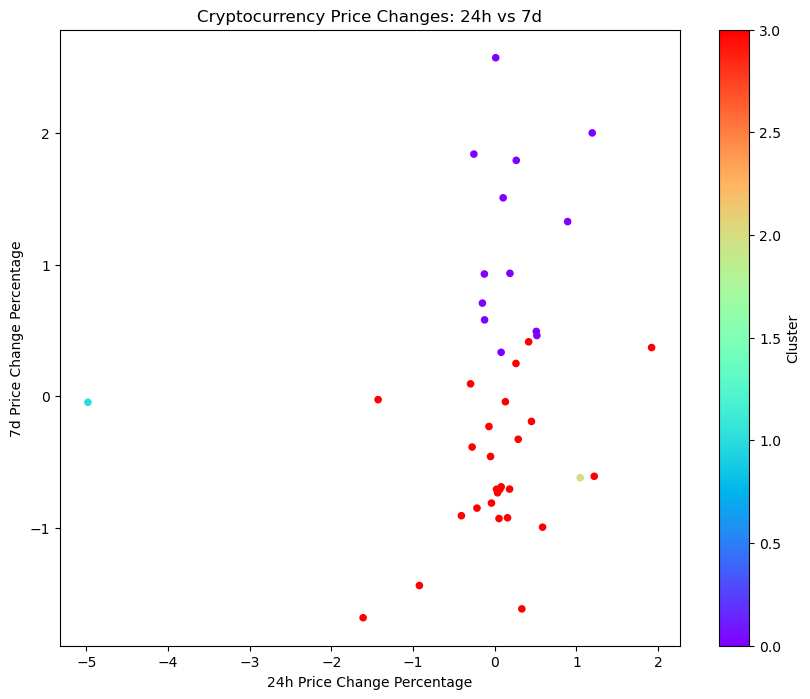

In [127]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

# Create a scatter plot
clustered_scaled_data_df.plot.scatter(
    x='price_change_percentage_24h', 
    xlabel= '24h Price Change Percentage',
    y='price_change_percentage_7d', 
    ylabel= '7d Price Change Percentage',
    c='Cluster', 
    colormap='rainbow', 
    figsize=(10, 8),
    title='Cryptocurrency Price Changes: 24h vs 7d'
)


### Optimize Clusters with Principal Component Analysis.

In [128]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3) # I chose four in the elbow curve and will use the same for the pca instance

In [129]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data_nd = pca.fit_transform(scaled_data_df)

# View the first five rows of the DataFrame. <-- This instruction needs to be corrected, this is not a dataframe
pca_data_nd[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [130]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
print (explained_variance_ratio)
print (explained_variance_ratio.sum())

[0.3719856  0.34700813 0.17603793]
0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** ***The total explained variance of the three principal components is 0.8950316570309841***

In [131]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you <---- There was no code provided in this step.

# Creating a DataFrame with the PCA data
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_df = pd.DataFrame(data=pca_data_nd, columns=pca_columns)

# Copy the crypto names from the original data
pca_df['coin_id'] = scaled_data_df.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [133]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=k, random_state=1)

# 2. Fit the model to the data using the scaled DataFrame
    k_model.fit(pca_df)

# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251
5,6,27.618972
6,7,21.134056
7,8,17.437664
8,9,13.742792
9,10,10.484890


<Axes: title={'center': 'Elbow Curve for Optimal k'}, xlabel='Number of clusters (k)', ylabel='Inertia'>

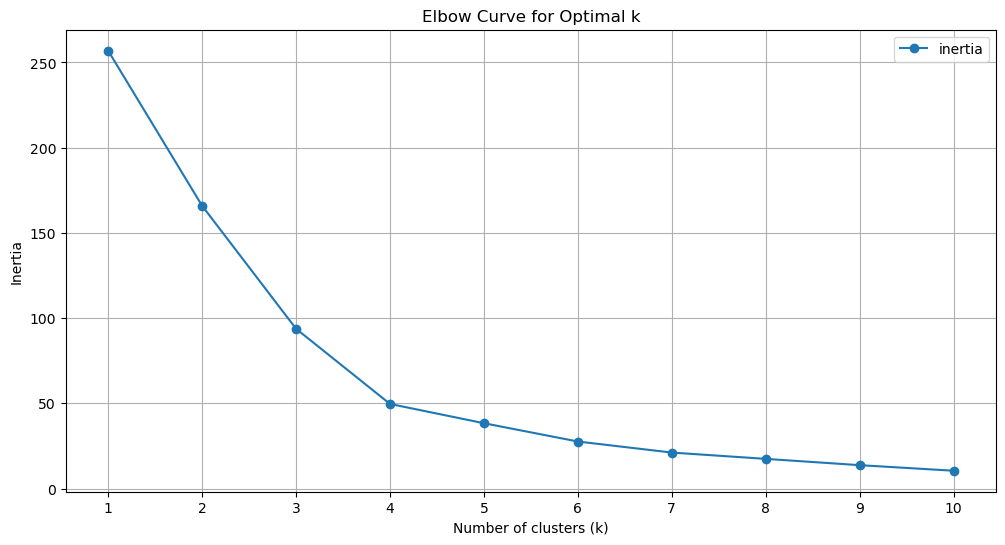

In [134]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve using the DataFrame
elbow_df.plot.line(
    x='k',
    y='inertia',
    marker='o',
    figsize=(12, 6),
    xlabel = 'Number of clusters (k)',
    ylabel = 'Inertia',
    title ='Elbow Curve for Optimal k',
    xticks = elbow_df['k'],
    grid = True)


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** ***The best value for `k` when using the PCA data is 4***


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** ***I chose 4 in both cases. When using the PCA data, the elbo is more pronounced at about 25 inertia units less.***

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [135]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

In [136]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [137]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_centers = kmeans.cluster_centers_

# Print the resulting array of cluster values.
cluster_centers


array([[-0.51072664,  0.84722621,  1.16731549],
       [ 8.08901821, -3.89689054,  2.30138208],
       [ 4.7923954 ,  6.76767868, -1.98698545],
       [-0.24007567, -0.53402803, -0.59574992]])

In [138]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df['Cluster'] = kmeans.labels_

# Display sample data
clustered_pca_df.head()


,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


<Axes: title={'center': 'Cryptocurrency Price Changes: PCA1 vs PCA2'}, xlabel='PCA1', ylabel='PCA2'>

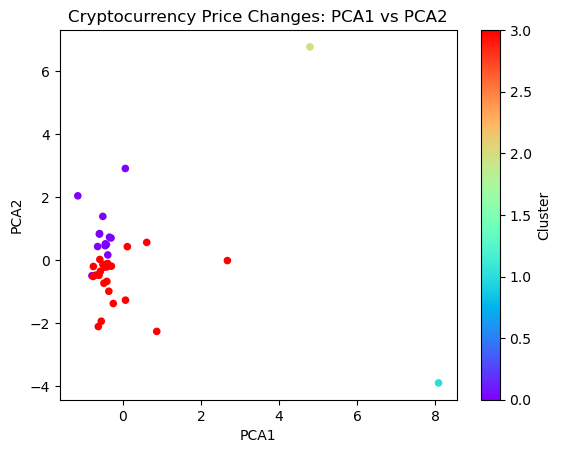

In [149]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Create a scatter plot
clustered_pca_df.plot.scatter(
    x='PCA1', 
    xlabel= 'PCA1',
    y='PCA2', 
    ylabel= 'PCA2',
    c='Cluster', 
    colormap='rainbow', 
    #figsize=(10, 8),
    title='Cryptocurrency Price Changes: PCA1 vs PCA2')

### Determine the Weights of Each Feature on each Principal Component

In [142]:
# Use the columns from the original scaled DataFrame as the index.
loadings_df = pd.DataFrame(pca.components_, columns=scaled_data_df.columns)
loadings_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
1,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
2,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**  
    * ***Component 0 : price_change_percentage_200d = 0.594468***
    * ***Component 1 : price_change_percentage_30d = 0.562182***
    * ***Component 2 : price_change_percentage_7d	= 0.787670***
    